# 2.4 Обучение, переобучение, недообучение и кросвалидация

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from graphviz  import Source
from IPython.display import SVG, display, HTML
style = "<style>svg{width: 30% !important; height: 30% !important;} </style>" 

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
# Дерево решений - алгоритм машинного обучения для регрессии и классификации. 
# Остановимся подробнее на задаче классификатора. 
# В процессе построения дерева выбираются переменные разделение, 
# по которым позволяет нам с большей точностью разделять исследуемые классы. 
# 
# В каждом листе дерева находится одно условие, которое разбивает наш набор данных на два подмножества.

# Процесс выбора фичей, которые помещаются в лист дерева основывается на расчете Information gain. 
# Могут использоваться и другие критерии.

# По умолчанию классификатор строит настолько глубокое дерево, насколько позволяет набор данных. 
# Таким образом, классификатор преследует цель безошибочно отнести к нужному классу все объекты в выборке. 
# Такой "жадный" алгоритм может приводить к переобучению в результате избыточной глубины дерева.

# Проверить насколько сильно переобучен классификатор можно обучив его на обучающей выборке, 
# затем проверить качество модели на тестовой выборке.

# Основная цель построения любой модели - получить классификатор с максимальной обобщающей способностью, 
# т.е. такой классификатор, который успешно выделяет общие закономерности 
# и не переобучается на частных закономерностях в конкретной выборке.

# Для этой цели мы подбираем оптимальный набор параметров классификатора, 
# в случае дерева решений - это может быть глубина дерева. 
# Для выбора оптимального параметра можно построить множество деревьев с разной глубиной и выбрать наилучший результат.

# В качестве критерия "наилучшего" классификатора можно использовать кросс-валидацию. 
# При таком подходе данные в выборке разбиваются на n частей, например на 5 частей, 
# далее классификатор обучается на 4 частях данных и валидируется на оставшейся 5ой части. 
# Затем операция повторяется, чтобы каждая из 5 частей данных оказалась в роли тестового множества.

# Титаник

In [5]:
titanic_data = pd.read_csv('data/titanic/train.csv')

In [6]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
drop_cols = ['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin']
X = titanic_data.drop(drop_cols, axis=1)
y = titanic_data['Survived']

In [10]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [11]:
X = pd.get_dummies(X)

In [12]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,38.0,1,0,71.2833,True,False,True,False,False
2,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,35.0,1,0,53.1000,True,False,False,False,True
4,3,35.0,0,0,8.0500,False,True,False,False,True


In [13]:
X.isna().sum()

Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [14]:
X = X.fillna({'Age': X['Age'].median()})
X.isna().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [15]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy')

In [16]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [17]:
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X),
                                    class_names=['Died', 'Survived'], filled=True))
# display(SVG(graph.pipe(format='svg')))

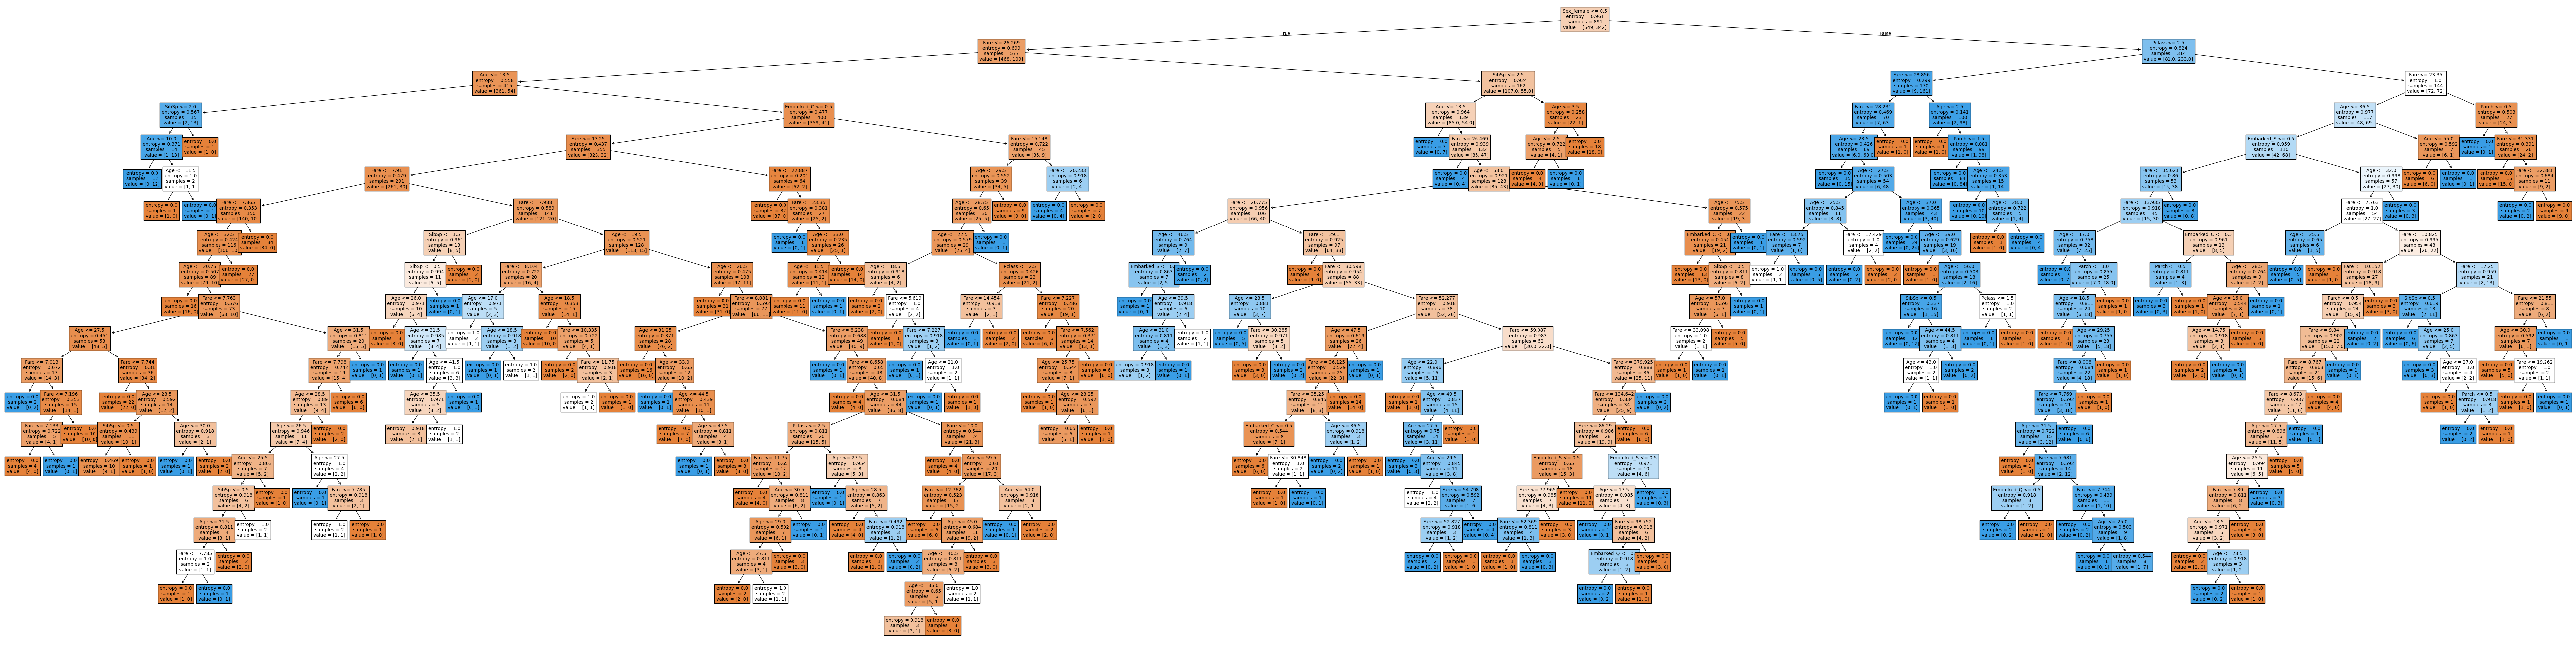

In [18]:
plt.figure(figsize=(100, 25))
tree.plot_tree(clf, fontsize=10, feature_names=list(X), filled=True);

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
len(X_test) / len(X)

0.33108866442199775

In [21]:
# Точность классификации
clf.score(X, y)

0.9797979797979798

In [22]:
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.9798657718120806

In [23]:
clf.score(X_test, y_test)

0.7728813559322034

In [24]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [25]:
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.8406040268456376
0.8067796610169492


In [26]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [27]:
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.8238255033557047
0.8203389830508474


In [28]:
max_depth_values = range(1, 100)

In [29]:
scores_data = pd.DataFrame()

In [30]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score]})
    
    scores_data = pd.concat([scores_data, temp_score_data])

In [31]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,2,0.805369,0.776271
0,3,0.823826,0.820339
0,4,0.833893,0.823729
0,5,0.840604,0.810169


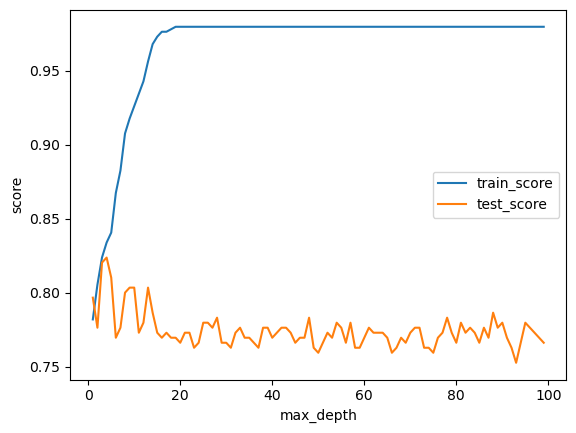

In [32]:
plt.plot(scores_data['max_depth'], scores_data['train_score'])
plt.plot(scores_data['max_depth'], scores_data['test_score'])
plt.xlabel('max_depth')
plt.ylabel('score')
plt.legend(['train_score', 'test_score'])

plt.show();

In [33]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'],
                      value_vars=['train_score', 'test_score'],
                      var_name='set_type',
                      value_name='score')

In [34]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


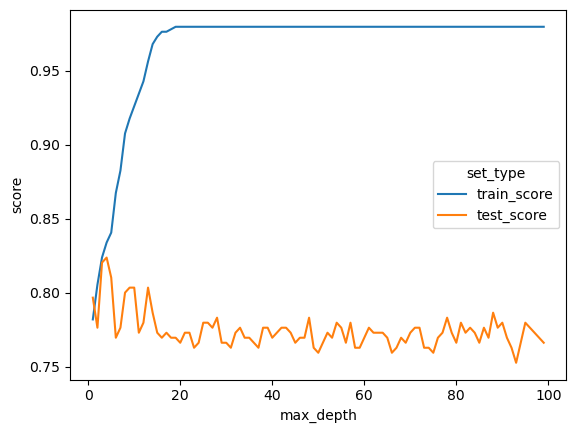

In [35]:
sns.lineplot(data=scores_data_long, x='max_depth', y='score', hue='set_type')
plt.show();

In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [38]:
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
cv_scores.mean()

0.7886274509803922

In [39]:
max_depth_values = range(1, 100)
scores_data = pd.DataFrame()

In [40]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    cv_score_mean = cross_val_score(clf, X_train, y_train, cv=5).mean()

    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score],
                                    'cv_score': [cv_score_mean]})
    
    scores_data = pd.concat([scores_data, temp_score_data])

In [41]:
scores_data.head()

,max_depth,train_score,test_score,cv_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.806780,0.798711


In [42]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'],
                      value_vars=['train_score', 'test_score', 'cv_score'],
                      var_name='set_type',
                      value_name='score')

In [43]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


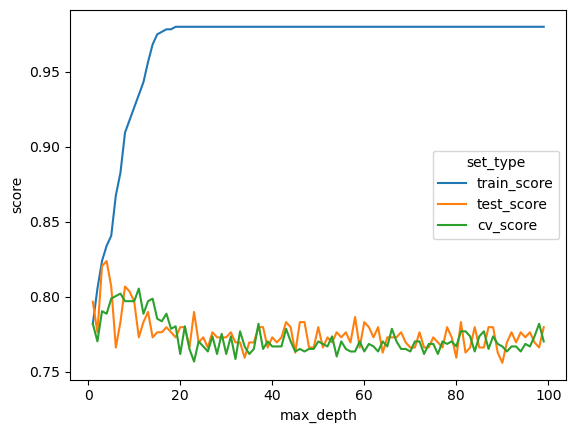

In [44]:
sns.lineplot(data=scores_data_long, x='max_depth', y='score', hue='set_type')
plt.show();

In [45]:
scores_data_long.query("set_type == 'cv_score'").head(20)

,max_depth,set_type,score
198,1,cv_score,0.781961
199,2,cv_score,0.770196
200,3,cv_score,0.790322
201,4,cv_score,0.788627
202,5,cv_score,0.798711
203,6,cv_score,0.800392
204,7,cv_score,0.802059
205,8,cv_score,0.797003
206,9,cv_score,0.796989
207,10,cv_score,0.796989


In [46]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [47]:
cv_scores = cross_val_score(best_clf, X_train, y_train, cv=5)
cv_scores.mean()

0.7969887955182072

In [48]:
cv_scores = cross_val_score(best_clf, X_test, y_test, cv=5)
cv_scores.mean()

0.7830508474576271

# GridSearchCV (поиск лучших параметров)

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
clf = tree.DecisionTreeClassifier(criterion='gini')
clf


DecisionTreeClassifier()

In [51]:
params = {'criterion': ['gini', 'entropy'], 
          'max_depth': range(1, 30)}

In [52]:
grid_search_cv_clf = GridSearchCV(clf, params, cv=5)

In [53]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [54]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 11}

In [55]:
best_clf = grid_search_cv_clf.best_estimator_
best_clf

DecisionTreeClassifier(criterion='entropy', max_depth=11)

In [56]:
best_clf.score(X_test, y_test)

0.7661016949152543

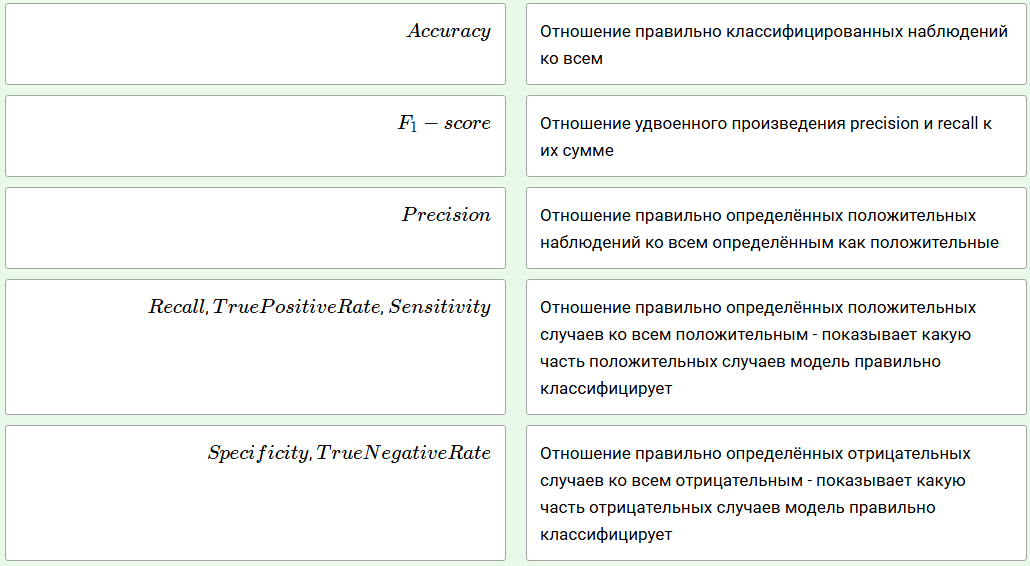

In [57]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [58]:
y_pred = best_clf.predict(X_test)
precision_score(y_test, y_pred)

0.7383177570093458

In [59]:
recall_score(y_test, y_pred)

0.6583333333333333

In [60]:
f1_score(y_test, y_pred)

0.6960352422907489

In [61]:
#Вероятность отнесения к классу
y_predicted_proba = best_clf.predict_proba(X_test)
y_predicted_proba

array([[0.42857143, 0.57142857],
       [0.5       , 0.5       ],
       [0.86206897, 0.13793103],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.14285714, 0.85714286],
       [0.86206897, 0.13793103],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.91666667, 0.08333333],
       [0.72727273, 0.27272727],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.71428571, 0.28571429],
       [0.96511628, 0.03488372],
       [1.        , 0.        ],
       [0.96511628, 0.03488372],
       [0.5       , 0.5       ],
       [0.71428571, 0.28571429],
       [0.86206897, 0.13793103],
       [0.96511628, 0.03488372],
       [1.        , 0.        ],
       [0.5       , 0.5       ],
       [0.5       , 0.5       ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.

In [62]:
# Только вторая колонка (отнесение к положительному классу)
print(y_predicted_proba[:, 1])

[0.57142857 0.5        0.13793103 1.         1.         0.
 0.85714286 0.13793103 0.         1.         1.         0.
 0.         0.08333333 0.27272727 1.         0.         0.28571429
 0.03488372 0.         0.03488372 0.5        0.28571429 0.13793103
 0.03488372 0.         0.5        0.5        0.         1.
 0.13793103 1.         0.22222222 1.         0.13793103 0.57142857
 0.22222222 0.85714286 1.         0.03488372 0.         1.
 0.03488372 0.1627907  0.         0.13793103 0.13793103 0.03488372
 0.1627907  0.         1.         1.         0.         1.
 0.         1.         0.5        0.         1.         0.28571429
 0.1627907  1.         1.         0.         0.1627907  1.
 0.         0.03488372 0.33333333 1.         0.         1.
 1.         1.         0.03488372 0.         0.85714286 1.
 1.         0.         0.         1.         1.         0.1627907
 0.5        0.         1.         1.         0.         0.1627907
 1.         0.         0.         0.1627907  0.03488372 0.034

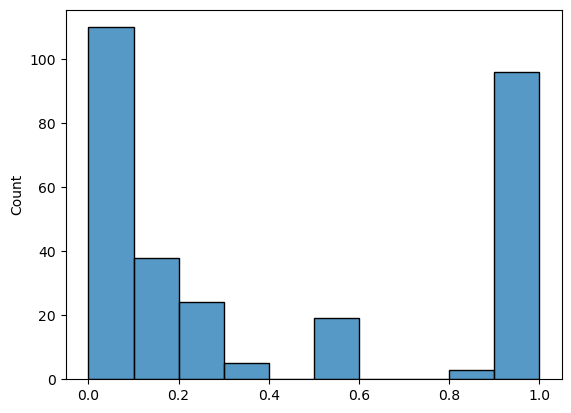

In [63]:
sns.histplot(y_predicted_proba[:, 1])
plt.show();

In [64]:
# Устанавливаем порог > 0.8 - принадлежность к классу 1
y_pred_08 = np.where(y_predicted_proba[:, 1] > 0.8, 1, 0)
y_pred_08

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0])

In [65]:
print(precision_score(y_test, y_pred))


0.7383177570093458


In [66]:
y_pred_02 = np.where(y_predicted_proba[:, 1] > 0.2, 1, 0)
y_pred_02

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0])

In [67]:
print(f'precision 0.5:  {precision_score(y_test, y_pred)}')
print(f'precision 0.8:  {precision_score(y_test, y_pred_08)}')
print(f'precision 0.2:  {precision_score(y_test, y_pred_02)}')
print()
print(f'recall 0.5:     {recall_score(y_test, y_pred)}')
print(f'recall 0.8:     {recall_score(y_test, y_pred_08)}')
print(f'recall 0.2:     {recall_score(y_test, y_pred_02)}')

precision 0.5:  0.7383177570093458
precision 0.8:  0.7777777777777778
precision 0.2:  0.673469387755102

recall 0.5:     0.6583333333333333
recall 0.8:     0.6416666666666667
recall 0.2:     0.825


In [68]:
# Варьируя границу мы можем варьировать параметр precesion, который увеличивается с увеличением строгости к данным, 
# то есть, если для нас совершить ошибку 1 рода 
# [предсказать, что человек выжил, в то время как он мертв] страшнее из-за возможной нехватки ресурсов.

# В то время как рост метрики recall позволяет нам более гуманно относится к людям,
#  и если вдруг мы отнесли человек к выжившим, даже если его шанс выжить крайне мал (ошибка 2-го рода), 
# мы все равно отправим к нему спасательную операцию, чтобы проверить, из-за возможно достаточного наличия ресурсов

In [69]:
pd.Series(y_predicted_proba[:, 1]).unique()

array([0.57142857, 0.5       , 0.13793103, 1.        , 0.        ,
       0.85714286, 0.08333333, 0.27272727, 0.28571429, 0.03488372,
       0.22222222, 0.1627907 , 0.33333333, 0.6       ])

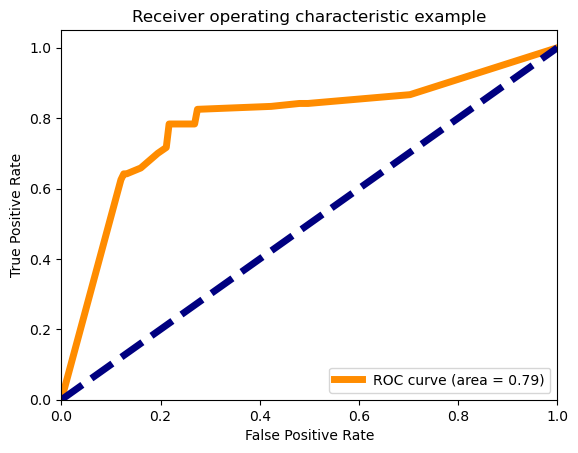

In [70]:
# ROC-кривая

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_proba[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=5, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show();

# True Positive Rate - какой процент пассажиров, которые выжили, классифицировали как выжившие
# False Positive Rate - какой процент пассажиров, которые не выжили, классифицировали как выжившие

# Ирисы

In [71]:
np.random.seed(0)

In [72]:
train_iris = pd.read_csv('data/train_iris.csv')
test_iris = pd.read_csv('data/test_iris.csv')

In [73]:
train_iris.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,130,7.4,2.8,6.1,1.9,2
1,7,5.0,3.4,1.5,0.2,0
2,11,4.8,3.4,1.6,0.2,0
3,142,5.8,2.7,5.1,1.9,2
4,109,7.2,3.6,6.1,2.5,2


In [74]:
X_train = train_iris.drop(['Unnamed: 0', 'species'], axis=1)
y_train = train_iris['species']

X_test = test_iris.drop(['Unnamed: 0', 'species'], axis=1)
y_test = test_iris['species']

In [75]:
scores_data = pd.DataFrame()

In [76]:
from sklearn.metrics import accuracy_score

max_depth_values = range(1, 100)

for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    test_score = accuracy_score(y_test, y_test_pred)

    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score]})
    
    scores_data = pd.concat([scores_data, temp_score_data])

scores_data.head()

,max_depth,train_score,test_score
0,1,0.70,0.60
0,2,0.97,0.94
0,3,0.99,0.94
0,4,1.00,0.92
0,5,1.00,0.92


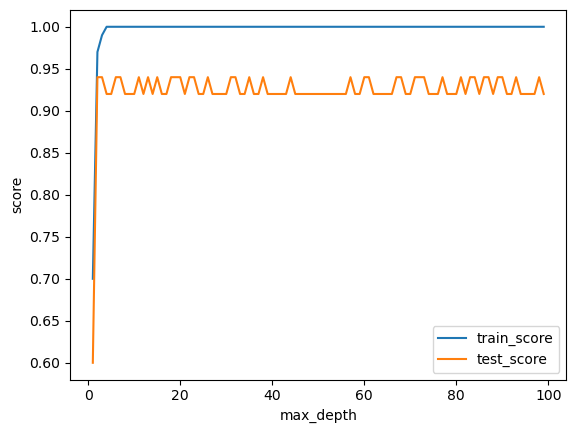

In [77]:
plt.plot(scores_data['max_depth'], scores_data['train_score'])
plt.plot(scores_data['max_depth'], scores_data['test_score'])

plt.xlabel('max_depth')
plt.ylabel('score')

plt.legend(['train_score', 'test_score'])

plt.show();

In [78]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'],
                      value_vars=['train_score', 'test_score'],
                      var_name='set_type',
                      value_name='score')

scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.70
1,2,train_score,0.97
2,3,train_score,0.99
3,4,train_score,1.00
4,5,train_score,1.00


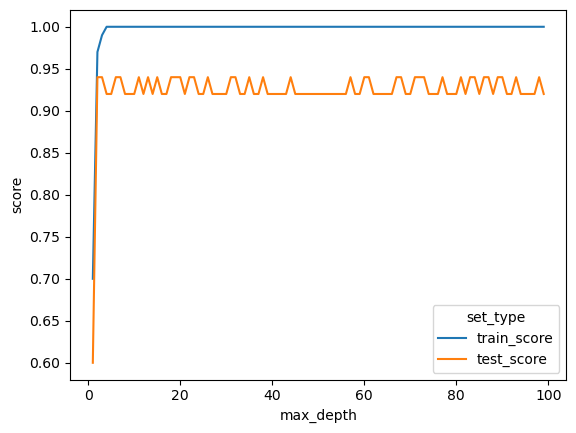

In [79]:
sns.lineplot(data=scores_data_long, x='max_depth', y='score', hue='set_type')
plt.show();

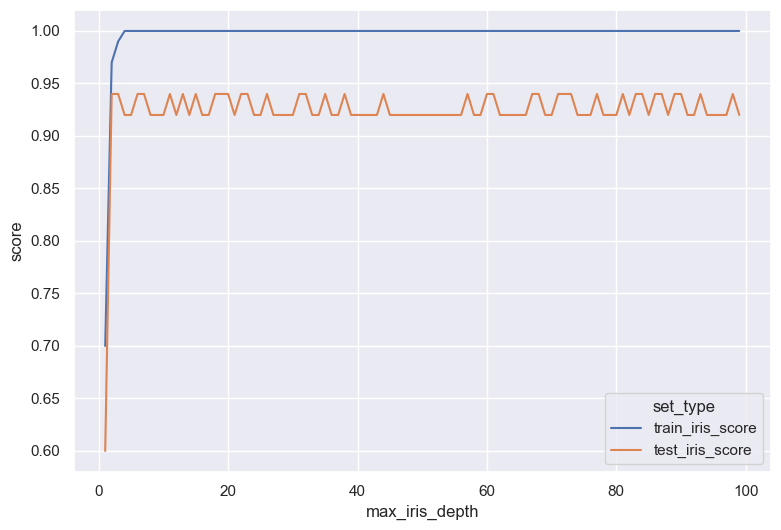

In [80]:
# Импортируем специализированные модули Pandas и Numpy, не являющиеся частью стандартной библиотеки Python.
import pandas as pd
import numpy as np

# а также импортируем модули Seaborn, Matplotlib для работы с графикой.
import matplotlib.pyplot as plt
import seaborn as sns


# Импортируем модуль tree из библиотеки sklearn для реализации алгоритмов решающих деревьев.
from sklearn import tree

# Импортируем модули, необходимые для визуализации дерева решений.
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from IPython.display import HTML

style = "<style>svg{width:70% !important;height:70% !important;}</style>"
HTML(style)


# Устанавливаем размер области для построения графиков.
sns.set_theme(rc={'figure.figsize': (9, 6)})

# Считываем тренировочный файл.
train_iris_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_iris.csv')
# Считываем тестовый файл.
test_iris_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/test_iris.csv')

# Отбросим колонки, не несущие важной информации для построения дерева решений.
# Отбрасываем не только предсказываемую species, но и первую колонку, так как она содержит id каждого экземпляра (цветка), а он для построения графика не нужен.
X_train_iris = train_iris_data.drop(['Unnamed: 0', 'species'], axis=1)
X_test_iris = test_iris_data.drop(['Unnamed: 0', 'species'], axis=1)

# Создадим переменные, которые будем предсказывать.
y_train_iris = train_iris_data.species
y_test_iris = test_iris_data.species

# Подберем оптимальное значение глубины обучения дерева.
# Зададим диапазон исследуемых значений.
max_iris_depth_values = range(1, 100)

# Обнулим DataFrame.
scores_iris_data = pd.DataFrame()

#  Задаем random seed.
rs = np.random.seed(0)

for max_iris_depth in max_iris_depth_values:
    # Изменяем глубину обучения дерева по циклу от 1 до 99 с шагом 1.
    clf_iris = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_iris_depth, random_state=rs)
    # Обучаем дерево решений (с ограниченной глубиной) на подмножестве train.
    clf_iris.fit(X_train_iris, y_train_iris)
    # Записываем в отдельную переменную число правильных ответов на обученной модели дерева
    # с ограниченной глубиной (подмножество train)
    train_iris_score = clf_iris.score(X_train_iris, y_train_iris)
    # Записываем в отдельную переменную число правильных ответов на обученной модели дерева
    # с ограниченной глубиной (подмножество test)
    test_iris_score = clf_iris.score(X_test_iris, y_test_iris)
    # Создаем временный DataFrame.
    temp_score_iris_data = pd.DataFrame({'max_iris_depth':[max_iris_depth],
                                         'train_iris_score':[train_iris_score],
                                         'test_iris_score':[test_iris_score]})
    # Наращиваем DataFrame "scores_iris_data".
    scores_iris_data = pd.concat([scores_iris_data, temp_score_iris_data])

# Видоизменим DataFrame, применив метод melt().
scores_iris_data_long = pd.melt(scores_iris_data, id_vars=['max_iris_depth'],
                           value_vars=['train_iris_score','test_iris_score'],
                           var_name='set_type', value_name='score')

# Визуализация.
sns.lineplot(x='max_iris_depth', y='score', hue='set_type', data=scores_iris_data_long)

# Отображение графиков Matplotlib и Seaborn.
plt.show();

# Котики и собачки

In [81]:
df_train = pd.read_csv(r'data\dogs_n_cats.csv')

df_train.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка


In [82]:
# Приводим собак к единице, котов к нулям. Строим дерево.

df_train['Вид'] = df_train['Вид'].replace(['собачка','котик'], [1,0])
X_train = df_train.drop('Вид', axis=1)
y_train = df_train['Вид']

X_train.head()

C:\Users\Pong\AppData\Local\Temp\ipykernel_12652\861911230.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['Вид'] = df_train['Вид'].replace(['собачка','котик'], [1,0])


,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,15,18.0,1,1,0
1,20,24.0,1,0,0
2,34,40.8,1,1,0
3,26,31.2,1,1,0
4,16,19.2,1,1,0


In [83]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

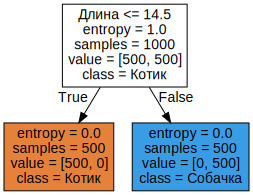

In [84]:
# Выводим дерево графически.

graph = Source(tree.export_graphviz(clf, out_file=None
               , feature_names=list(X_train), class_names=['Котик', 'Собачка']
               , filled = True))
display(SVG(graph.pipe(format='svg')))

In [85]:
df_test = pd.read_json(r'data/dataset_209691_15.txt')

df_test.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,22,26.4,1,1,0
1,33,39.6,1,1,0
2,24,28.8,1,1,0
3,29,34.8,1,1,0
4,24,28.8,1,1,0


In [86]:
sum(df_test['Длина'] > 14.5)

53

In [87]:
# Даем дереву данные, которые для попыток индивидуальны. Предсказание начинается.

X_test = df_test
y_pred = clf.predict(X_test)

In [88]:
# Далее считаем котов и собак, которых предсказали.
print(y_pred.tolist().count(1))
print(y_pred.sum())

53
53


# 2.5 Метрики качества модели

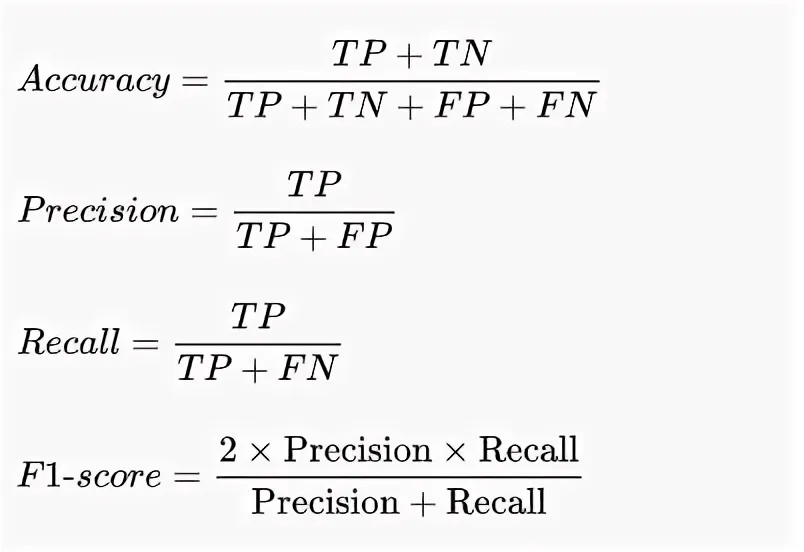

In [89]:
# Precision (точность) - отношение TP к TP + FP. 
# Это доля объектов, названными классификатором положительными и при этом действительно являющимися положительными.
# Отражает верно классифицированные положительные объекты с учетом ложных срабатываний.

# Recall (Полнота) - отношение TP к TP + FN. 
# Это то, какую долю объектов положительного класса из всех объектов положительного класса нашёл алгоритм.
# Отражает верно классифицированные положительные объекты с учетом всех положительных объектов.

In [90]:
# Пастух сказал что волки есть в 30 случаях из 100

# TP
# На самом деле волки были в 15 случаях из этих 30. Это как раз и есть "верное срабатывание" или True Positive.

# FP
# Соответственно ситуация, когда пастух сказал что волки есть, а их не было называется False Positive (в данном случае это тоже 15). 
# Иными словами "ложное срабатывание".

# FN
# Из 70 оставшихся случаев - 30 раз волки были, но пастух сказал что волков нет - это False Negative, 
# то есть "пропуск события"

# Далее осталось 40 случаев, когда пастух сказал что волков нет и их действительно не было. Это True Negative, 
# получается что-то типа "верное бездействие"

In [91]:
# Некий Анатолий зарегистрировался в приложении знакомств, 
# некий алгоритм на основе машинного обучения порекомендовал Анатолию 30 фотографий из 100. 
# Анатолий лайкнул 15 фотографий из 30 предложенных, в дальнейшем выяснилось, 
# что Анатолий мог бы лайкнуть еще 30 фотографий из 70 непредложенных.

# Будем считать, что лайк Анатолия является положительным исходом, а отсутствие лайка - отрицательным. 
# Соответственно предсказанный лайк, совпавший с реальным - True positive, 
# предсказанный лайк, не завершившийся реальным лайком - False positive и т. д. 

# Давайте оценим работу алгоритма с точки зрения метрик качества модели.

TP = 15
FP = 15
TN = 40
FN = 30

precision = TP / (TP + FP)
print(precision)

recall = TP / (TP + FN)
print(recall)

f1 = 2 * TP / (2 * TP + FP + FN)
print(f1)

f1 = 2 * precision * recall / (precision + recall)
print(f1)

0.5
0.3333333333333333
0.4
0.4


In [92]:
# Поупражняемся в расчётах precision. 
# В задании даны переменные, содержащие информацию о песнях и артистах - X_train, y_train, X_test и y_test. 
# Исходно в датасэтах содержались тексты песен, но Decision Tree работает с категориальными и числовыми переменными, а текст это... текст. 
# Поэтому его необходимо преобразовать в понятную для модели форму. 
# В данном случае для каждой песни просто посчитаны длина и количество некоторых знаков пунктуации.

# Обучите модель на тренировочных данных, предскажите авторов для тестовых и поместите в переменную predictions. 
# Затем посчитайте precision score на предсказаниях и y_test, укажите параметр average='micro', 
# и сохраните результат в переменную precision.

# Если он будет недостаточно высок, потюньте немного модель.

songs_data = pd.read_csv('data/songs.csv')
songs_data.head()

,song,year,artist,genre,lyrics,length,commas,exclamations,colons,hyphens
0,the-ownerz,2007,gangstarr,Hip-Hop,"""One-two..""\n""One-two, shots to the chin.. kno...",1300,24,5,0,11
1,dead-sound-of-misery,2006,blind-guardian,Metal,It's dark\nLet's do it now\nBring in the siren...,1566,0,0,0,0
2,modred-s-song,2006,blind-guardian,Metal,I've lost my battle before it starts\nmy first...,996,1,0,1,0
3,the-ninth-wave,2015,blind-guardian,Metal,As dark night embraces\nWe are the nation\nI w...,2868,5,0,0,0
4,skills,2014,gangstarr,Hip-Hop,"Skills, skills, skills\n""My Microphone""\n""It's...",3351,22,0,0,3


In [93]:
from sklearn.metrics import precision_score

# Создание выборок
X = songs_data.drop(['song', 'artist', 'lyrics', 'genre'], axis=1)
y = songs_data['artist']

# Разбивка выборок
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.333, random_state=42)

scores_data = pd.DataFrame()

for max_depth in range(1, 100):
    clf = tree.DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    precision = precision_score(y_test, predictions, average='micro')
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 'score': [precision]})
    scores_data = pd.concat([scores_data, temp_score_data])

scores_data.sort_values('score', ascending=False).head()

,max_depth,score
0,7,0.841667
0,6,0.833333
0,8,0.808333
0,9,0.808333
0,11,0.808333


In [94]:
# Скачайте набор данных с тремя переменными: sex, exang, num. 
# Представьте, что при помощи дерева решений мы хотим классифицировать есть или нет у пациента заболевание сердца (переменная num), 
# основываясь на двух признаках: пол (sex) и наличие/отсутсвие стенокардии (exang). 
# Обучите дерево решений на этих данных, используйте entropy в качестве критерия.

# Укажите, чему будет равняться значение Information Gain для переменной,  
# которая будет помещена в корень дерева.

# В ответе необходимо указать число с точностью 3 знака после запятой.

In [95]:
df = pd.read_csv('data/train_data_tree.csv')
df.head()

,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1


In [96]:
X = df.drop('num', axis=1)
y = df['num']

In [97]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

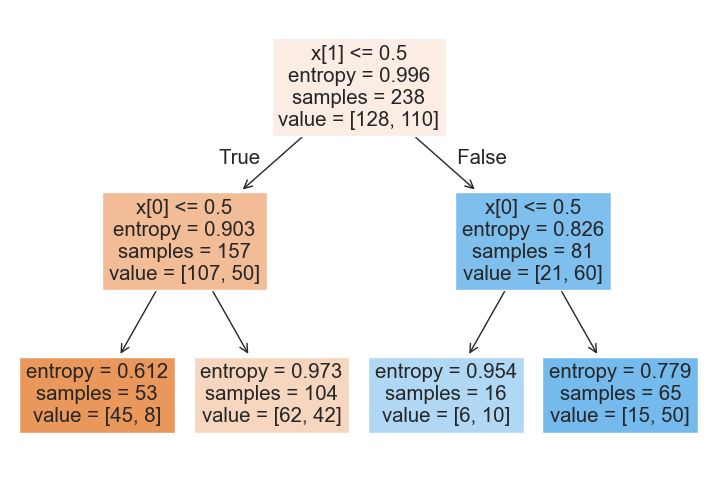

In [98]:
tree.plot_tree(clf, filled=True)
plt.show();

In [99]:
IG = 0.996 - (157*0.903 + 81*0.826)/(238)
IG

0.11920588235294105

In [100]:
# IG = 0.996 - (n0*E0 + n1*E1)/N

# n0 - чило сэмплов слева, n1 - число сэмплов справа, E0 - энтропия слева, Е1 - энтропия справа. N = n0+n1 

E = clf.tree_.impurity[0]

l_node = clf.tree_.children_left[0] # индекс корня левого поддерева
n0 = clf.tree_.n_node_samples[l_node] # сэмплов в левом поддереве
e0 = clf.tree_.impurity[l_node] # энтропия в корне левого поддерева

r_node = clf.tree_.children_right[0] # индекс корня правого поддерева
n1 = clf.tree_.n_node_samples[r_node] # сэмплов в правом поддереве
e1 = clf.tree_.impurity[r_node] # энтропия в корне правого поддерева

IG = E - (n0*e0 + n1*e1)/ (n0 + n1)
IG

0.11939340343891591

In [101]:
# Одним из способов найти более-менее оптимальный набор параметров дерева является перебор множества деревьев с разными параметрами и выбор подходящего.
# Для этой цели существует класс GridSearchCV, перебирающий каждое из сочетаний параметров среди заданных для модели, обучающий её на данных и проводящих кросс-валидацию. После этого в аттрибуте .best_estimator_ храниться модель с лучшими параметрами.
# Это применимо не только к деревьям, но и к другим моделям sklearn.

# Теперь задание - осуществите перебор всех деревьев на данных ириса по следующим параметрам:
# максимальная глубина - от 1 до 10 уровней
# минимальное число проб для разделения - от 2 до 10
# минимальное число проб в листе - от 1 до 10
# и сохраните в переменную best_tree лучшее дерево. Переменную с GridSearchCV назовите search

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

In [102]:
dt = DecisionTreeClassifier(random_state=42)
dt

DecisionTreeClassifier(random_state=42)

In [103]:
params = {'max_depth': range(1, 10), 
          'min_samples_split': range(2, 10),
          'min_samples_leaf': range(1, 10)}

search = GridSearchCV(dt, params)
search.fit(X, y)

print(search.best_params_)

best_tree = search.best_estimator_
best_tree

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


DecisionTreeClassifier(max_depth=3, random_state=42)

In [104]:
# Чем больше данных, сложность модели и число её параметров, тем дольше будет вестись поиск GridSearchCV. 
# Однако бывают случаи, когда модель нужна здесь и сейчас, и для этого есть RandomizedSearchCV!
# Пробегаясь по рандомной подвыборке параметров, он ищет наиболее хорошую модель 
# и делает это быстрее полного перебора параметров, хотя и может пропустить оптимальные параметры.

# Здесь можно посмотреть на сравнение этих поисков.

# Осуществим поиск по тем же параметрам что и в предыдущем задании с помощью RandomizedSearchCV

# максимальная глубина - от 1 до 10 уровней
# минимальное число проб для разделения - от 2 до 10
# минимальное число проб в листе - от 1 до 10
# Cохраните в переменную best_tree лучшее дерево. Переменную с RandomizedSearchCV назовите search

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

In [105]:
dt = DecisionTreeClassifier(random_state=42)
dt

DecisionTreeClassifier(random_state=42)

In [106]:
params = {'max_depth': range(1, 10), 
          'min_samples_split': range(2, 10),
          'min_samples_leaf': range(1, 10)}

search = RandomizedSearchCV(dt, params)
search.fit(X, y)

print(search.best_params_)

best_tree = search.best_estimator_
best_tree

{'min_samples_split': 8, 'min_samples_leaf': 1, 'max_depth': 6}


DecisionTreeClassifier(max_depth=6, min_samples_split=8, random_state=42)

In [107]:
# В процессе решения одной аналитической задачи очень часто замечаешь и другие задачи, связанные с исследуемым вопросом. 
# В свое время, работая над предсказанием оттока студентов со stepik, я многое изменил в структуре своих курсов. 

# Тогда я нашел довольно интересную закономерность прохождения онлайн курсов. 

# Слушатели онлайн курсов очень негативно реагируют на невозможность решить задачу, 
# иными словами, если студент застрял на определенном шаге, то он, с высокой вероятность, 
# вообще бросит курс, чем просто пропустит этот шаг и продолжит обучение. 

# Давайте найдем такой стэп, используя данные о сабмитах. 
# Для каждого пользователя найдите такой шаг, который он не смог решить, и после этого не пытался решать другие шаги. 
# Затем найдите id шага, который стал финальной точкой практического обучения на курсе для максимального числа пользователей. 

# То есть мы исследуем следующий сценарий: человек решает стэп, не может получить правильный ответ 
# и больше не возвращается к практическим задачам. Что это за шаг такой, который отпугнул максимальное число пользователей?

data = pd.read_csv('https://stepik.org/media/attachments/course/4852/submissions_data_train.zip')
data[data.submission_status == "wrong"].groupby(['user_id', 'step_id'], as_index=False).agg({'timestamp':'max'}).step_id.value_counts().keys()[0]

31978

# Задача про пользователей курса

In [141]:
events_data = pd.read_csv('data/event_data_train.csv')
submission_data = pd.read_csv('data/submissions_data_train.csv')
events_data['date'] = pd.to_datetime(events_data.timestamp, unit = 's')
events_data['day'] = events_data.date.dt.date

submission_data['date'] = pd.to_datetime(submission_data.timestamp, unit = 's')
submission_data['day'] = submission_data.date.dt.date

users_data = events_data.groupby('user_id', as_index= False)\
        .agg({'timestamp': 'max'})\
        .rename({'timestamp':'last_timestamp'}, axis = 'columns')
now = 1526772811
drop_out_threasold = 2592000

users_data['is_gone_user'] = (now - users_data.last_timestamp) > drop_out_threasold
users_scores = submission_data.pivot_table(index='user_id',\
                        columns = 'submission_status',\
                        values = 'step_id',\
                        aggfunc = 'count',\
                        fill_value = 0)\
                        .reset_index()
users_data = users_data.merge(users_scores, on = 'user_id', how = 'outer')
users_data = users_data.fillna(0)
users_invent_data = events_data.pivot_table(index = 'user_id',
                        columns = 'action',
                        values  = 'step_id',
                        aggfunc = 'count',
                        fill_value = 0).reset_index()
users_data = users_data.merge(users_invent_data, how = 'outer')
users_days = events_data.groupby('user_id').day.nunique()
users_days.to_frame().reset_index()
users_data = users_data.merge(users_days, on = 'user_id', how = 'outer')
users_data['passed_corse'] = users_data.passed > 170

In [142]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_corse
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False


# 3.2 Random forest

In [148]:
# Загрузка данных
titanic_data = pd.read_csv('data/titanic/train.csv')

# Удаление, заполнение и преобразование фичей
drop_cols = ['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin']
X = titanic_data.drop(drop_cols, axis=1)
y = titanic_data['Survived']
X = pd.get_dummies(X)
X = X.fillna({'Age': X['Age'].median()})

# Разделение на тренировочную и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [149]:
from sklearn.ensemble import RandomForestClassifier

In [150]:
clf_rf = RandomForestClassifier()

In [151]:
params = {'n_estimators': [10, 20, 30],
          'max_depth': [2, 5, 7, 10]}

In [152]:
grid_search_cv_clf = GridSearchCV(clf_rf, params, cv=5)
grid_search_cv_clf

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})

In [153]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})

In [154]:
grid_search_cv_clf.best_params_

{'max_depth': 7, 'n_estimators': 20}

In [156]:
best_clf_rf = grid_search_cv_clf.best_estimator_

In [158]:
y_pred = best_clf_rf.predict(X_test)

In [159]:
accuracy_score(y_pred, y_test)

0.8203389830508474

In [163]:
# Важность переменных

feature_importances = best_clf_rf.feature_importances_
feature_importances

array([0.09188622, 0.15247355, 0.06116188, 0.0323422 , 0.2071841 ,
       0.26990048, 0.13761044, 0.0166656 , 0.00517912, 0.02559642])

In [170]:
feature_importances_df = pd.DataFrame({'features': list(X_train),
                                       'feature_importances': feature_importances})

feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
5,Sex_female,0.269900
4,Fare,0.207184
1,Age,0.152474
6,Sex_male,0.137610
0,Pclass,0.091886
2,SibSp,0.061162
3,Parch,0.032342
9,Embarked_S,0.025596
7,Embarked_C,0.016666
8,Embarked_Q,0.005179


# Съедобность грибов

In [226]:
# Переберите параметры с помощью GridSearchCV и обучите Random Forest на данных, 
# указанных в предыдущем стэпе. Передайте в GridSearchCV модель с указанием random_state

# RandomForestClassifier(random_state=0)
# Параметры для выбора -

# n_estimators: от 10 до 50 с шагом 10
# max_depth: от 1 до 12 с шагом 2
# min_samples_leaf: от 1 до 7
# min_samples_split: от 2 до 9 с шагом 2
# Укажите cv=3. Для ускорения расчётов в GridSearchCV можно указать n_jobs=-1, чтобы использовать все процессоры.

# Какие параметры Random Forest были отобраны как наилучшие для решения на этих данных?

df = pd.read_csv('data/training_mush.csv')
df.shape

(6093, 23)

In [227]:
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,1,2,2,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,0,1,3,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,1,1,1,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,0,1,2,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,1,2,2,3,6,0,2,1,4,2,5,0,0


In [228]:
X = df.drop('class', axis=1)
y = df['class']

In [229]:
clf_rf = RandomForestClassifier(random_state=0)
clf_rf

RandomForestClassifier(random_state=0)

In [230]:
params = {'n_estimators': range(10, 51, 10),
          'max_depth': range(1, 13, 2),
          'min_samples_leaf': range(1, 8),
          'min_samples_split': range(2, 10, 2)}

In [231]:
grid_search_cv_clf = GridSearchCV(clf_rf, params, cv=3, n_jobs=-1)

In [232]:
grid_search_cv_clf.fit(X, y)
grid_search_cv_clf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [233]:
# Теперь у нас есть классификатор, определяющий какие грибы съедобные, а какие нет, испробуем его! 
# Предскажите съедобность этих данных грибов и напишите в ответ число несъедобных грибов (класс равен 1).

X_test = pd.read_csv('data/testing_mush.csv')
X_test.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,2,2,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,1,2,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,0,2,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,0,2,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,0,2,1,6,6,0,2,1,0,7,4,4


In [234]:
best_clf_rf = grid_search_cv_clf.best_estimator_
y_pred = best_clf_rf.predict(X_test)
sum(y_pred)

976

In [235]:
# Выберите правильные утверждения о важности фичей для нашего классификатора

pd.DataFrame(list(X), best_clf_rf.feature_importances_).sort_index(ascending=False).T

# odor > population > gill-attachment

,0.188376,0.103861,0.103793,0.083564,0.080840,0.070726,0.070109,0.068461,0.048296,0.043783,0.031802,0.022611,0.021773,0.017689,0.013910,0.010881,0.007563,0.006253,0.003130,0.002577,0.000000,0.000000
0,odor,gill-color,stalk-root,spore-print-color,gill-spacing,ring-type,bruises,gill-size,stalk-surface-below-ring,population,stalk-surface-above-ring,habitat,cap-color,stalk-color-above-ring,ring-number,veil-color,stalk-shape,stalk-color-below-ring,cap-surface,cap-shape,veil-type,gill-attachment


In [236]:
y_test = pd.read_csv('data/testing_y_mush.csv')

In [253]:
# Создайте confusion matrix по предсказаниям, полученным вами в прошлом уроке и правильным ответам. 
# Выберите из предложенных вариантов правильный

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

cm = confusion_matrix(y_pred, y_test)
cm

array([[1055,    0],
       [   0,  976]], dtype=int64)

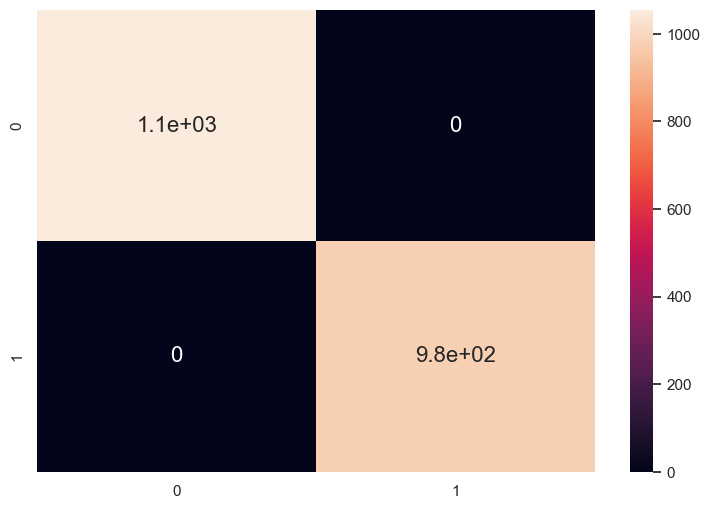

In [254]:
sns.heatmap(cm, annot=True, annot_kws={"size": 16})
plt.show();

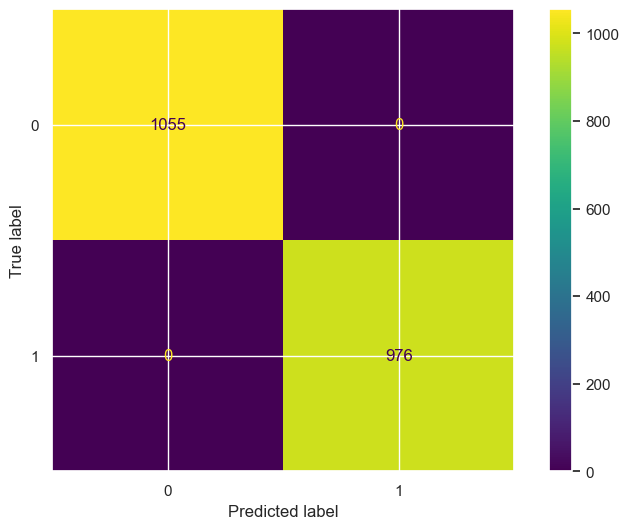

In [256]:
displ = ConfusionMatrixDisplay(cm)
displ.plot();

In [ ]:
# На Землю нападают войска жукеров, и в их флоте присутствуют транспортники, истребители и крейсеры. 
# Для борьбы с каждым типом кораблей используется свой вид оружия. 
# Как аналитику из Штаба Обороны, вам поручено разработать модель, 
# предсказывающую какие корабли участвуют в атаке, чтобы успешно отбить нападения на различные области планеты

# Данных удалось собрать немного, и предсказывать придётся гораздо больший по объёму массив.

# Обучите модель и предскажите классы кораблей для новых поступающих данных. 
# Укажите в ответе через пробел число крейсеров, транспортников и истребителей.

# От вашего ответа зависит судьба человечества!

In [257]:
train_df = pd.read_csv('data/invasion.csv')
train_df.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [258]:
test_df = pd.read_csv('data/operative_information.csv')
test_df.head()

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,7.516543,3.916691,513.954279,0.177247,105908,13.267224
1,4.322988,6.967689,63.752970,0.545922,277855,39.833130
2,4.595724,9.098297,62.233948,0.389201,160662,42.014556
3,2.689675,7.964869,62.475495,0.541081,162092,42.056829
4,8.075576,5.169719,336.441261,0.174757,466853,11.779813


In [259]:
X_train = train_df.drop('class', axis=1)
y_train = train_df['class']

In [260]:
clf_rf = RandomForestClassifier(criterion='gini')
params = {'n_estimators': range(1,20,1),
          'max_depth': range(1,13,2),
          'min_samples_leaf': range(1,8),
          'min_samples_split': range(2,10,2)}

grid_search_cv_clf = GridSearchCV(clf_rf, params, cv=3, n_jobs=-1)
grid_search_cv_clf.fit(X, y)
grid_search_cv_clf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 4}

In [261]:
best_clf = grid_search_cv_clf.best_estimator_
best_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, n_estimators=4)

In [267]:
y_pred = best_clf.predict(test_df)
pd.Series(y_pred).value_counts()

fighter      675
transport    595
cruiser      230
Name: count, dtype: int64

In [277]:
# Какая переменная оказалась самой важной для классифицирования кораблей?

pd.DataFrame(list(X_train), best_clf.feature_importances_).sort_index(ascending=False)

,0
0.660141,volume
0.167228,brightness
0.160395,speed
0.012236,i_reflection
0.000000,g_reflection
0.000000,time_of_observance


In [283]:
# Благодаря вашим стараниям войска захватчиков были разгромлены, но война ещё не окончена! 
# Вас повысили и перевели на новое направление (новые должности - новые задачи) - 
# теперь нужно выявлять опасные регионы космоса, где могут находиться жукеры.

# Проанализируйте имеющиеся данные об опасности разных регионов космоса и укажите наиболее вероятные причины угрозы

df = pd.read_csv('data/space_can_be_a_dangerous_place.csv')
df.head()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1


In [284]:
X = df.drop('dangerous', axis=1)
y = df['dangerous']

In [286]:
df.corr()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
r,1.000000,0.001023,1.000000,-0.003336,0.002337,0.001797,0.000326,0.005788
phi,0.001023,1.000000,0.001023,0.001921,0.002875,-0.004726,-0.000803,0.003035
peradventure_index,1.000000,0.001023,1.000000,-0.003336,0.002337,0.001797,0.000326,0.005788
dustiness,-0.003336,0.001921,-0.003336,1.000000,-0.004691,-0.001290,0.003370,-0.000499
black_hole_is_near,0.002337,0.002875,0.002337,-0.004691,1.000000,-0.001874,0.002661,0.052968
buggers_were_noticed,0.001797,-0.004726,0.001797,-0.001290,-0.001874,1.000000,-0.003031,0.344469
nearby_system_has_planemo,0.000326,-0.000803,0.000326,0.003370,0.002661,-0.003031,1.000000,0.299508
dangerous,0.005788,0.003035,0.005788,-0.000499,0.052968,0.344469,0.299508,1.000000


<Axes: >

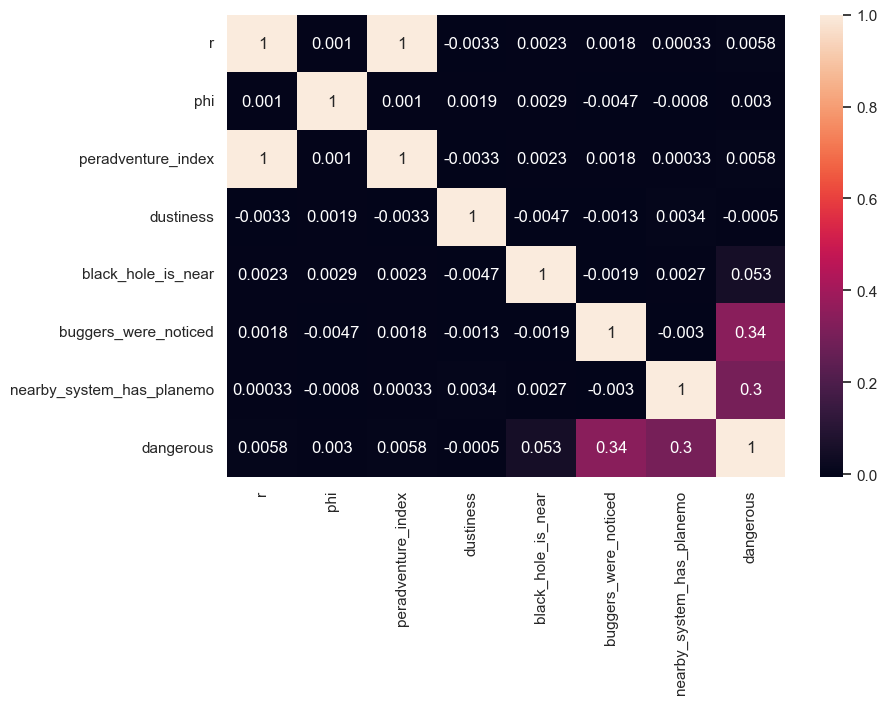

In [ ]:
sns.heatmap(df.corr(), annot=True)
plt.show();

In [288]:
clf_rf = RandomForestClassifier(criterion='entropy')
params = {'n_estimators': range(1,10,2),
          'max_depth': range(1,7,2),
          'min_samples_leaf': range(1,7,2),
          'min_samples_split': range(2,9,2)}

grid_search_cv_clf = GridSearchCV(clf_rf, params, cv=3, n_jobs=-1)
grid_search_cv_clf.fit(X, y)
grid_search_cv_clf.best_params_

{'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 7}

In [289]:
best_clf = grid_search_cv_clf.best_estimator_
best_clf.fit(X, y)

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       min_samples_split=8, n_estimators=7)

In [290]:
pd.DataFrame(list(X), best_clf.feature_importances_).sort_index(ascending=False)

,0
0.520292,buggers_were_noticed
0.429561,nearby_system_has_planemo
0.032570,black_hole_is_near
0.005449,dustiness
0.004827,r
0.004308,phi
0.002993,peradventure_index
